In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from itertools import combinations
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.io as pio
pio.renderers.default = 'svg'  # for showing on github plotly image

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('stud_math.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


The essence of the project is to track the impact of living conditions of students aged 15 to 22 on their academic performance in mathematics, in order to identify students at risk at an early stage.

To determine the parameters of the future model, conduct a exploratory data analysis and compile a report on its results.

## Data Exploration

Let's look at the variables that the dataset contains::

1 school — abbreviation of the school in which the student is studying

2 sex — student gender ('F' - female, 'M' - male)

3 age — student age (15 to 22)

4 address — student address type ('U' - city, 'R' - out of town)

5 famsize - family size ('LE3' <= 3, 'GT3'> 3)

6 Pstatus - status of parents' shared housing ('T' - live together 'A' - separately)

7 Medu - mother's education (0 - no, 1 - 4 classes, 2 - 5-9 classes, 3 - secondary special or 11 classes, 4 - higher)

8 Fedu - father's education (0 - no, 1 - 4 classes, 2 - 5-9 classes, 3 - secondary special or 11 classes, 4 - higher)

9 Mjob - mother's work ('teacher' - teacher, 'health' - healthcare, 'services' - public service, 'at_home' - not working, 'other' - other)

10 Fjob - father's work ('teacher' - teacher, 'health' - healthcare, 'services' - public service, 'at_home' - not working, 'other' - other)

11 reason - the reason for choosing a school ('home' - proximity to home, 'reputation' - school reputation, 'course' - educational program, 'other' - other)

12 guardian - guardian ('mother' - mother, 'father' - father, 'other' - other)

13 traveltime - travel time to school (1 - <15 min., 2 - 15-30 min., 3 - 30-60 min., 4 -> 60 min.)

14 studytime - time to study in addition to school per week (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 -> 10 hours)

15 failures - the number of extracurricular failures (n, if 1 <= n <3, otherwise 0)

16 schoolsup - additional educational support (yes or no)

17 famsup - family educational support (yes or no)

18 paid - additional paid classes in mathematics (yes or no)

19 activities - extracurricular activities (yes or no)

20 nursery - attended kindergarten (yes or no)

21 higher - wants to get a higher education (yes or no)

22 internet - Internet at home (yes or no)

23 romantic - in a romantic relationship (yes or no)

24 famrel - family relationships (from 1 - very poor to 5 - very good)

25 freetime - free time after school (from 1 - very little to 5 - very much)

26 goout - spending time with friends (from 1 - very little to 5 - very much)

27 health - current state of health (from 1 - very poor to 5 - very good)

28 absences - number of lessons missed

29 score - math exam scores

In [4]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset has 395 rows and 30 columns.


In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
stat = []
for col in df.columns:
    stat.append((col, df[col].nunique(),
                  df[col].isnull().sum() * 100 / df.shape[0],
                  df[col].value_counts(normalize=True,
                  dropna=False).values[0] * 100,
                  df[col].dtype))
stats_df = pd.DataFrame(stat,
                        columns=['Feature', 'Unique_values',
                                 'Percentage of missing values',
                                 'Percentage of values in the biggest cat',
                                 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest cat,type
5,Pstatus,2,11.392405,79.493671,object
17,paid,2,10.126582,50.632911,object
16,famsup,2,9.873418,55.443038,object
9,Fjob,5,9.113924,49.873418,object
22,internet,2,8.607595,77.215190,object
23,romantic,2,7.848101,60.759494,object
11,guardian,3,7.848101,63.291139,object
12,traveltime,4,7.088608,61.265823,float64
24,famrel,6,6.835443,46.075949,float64
4,famsize,2,6.835443,66.075949,object


In [7]:
print(f'There are {df.isnull().any().sum()} columns with missing values.')

There are 27 columns with missing values.


In [8]:
df.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

We can see several interesting things here:

There aren't columns with 99%+ missing values, which means that no columns are useless on first look;

There aren't columns with 95% values belong to one category, which means that no columns are useless on first look;

Column 'studytime,_granular' missing in description.

Look at target column.

<AxesSubplot:>

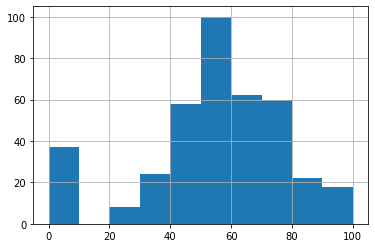

In [9]:
df.score.hist()

In [10]:
df.score.isna().sum()

6

Delete missing values in the target column.

In [11]:
df.dropna(subset=['score'], inplace=True)
df.score.isna().sum()

0

In [12]:
df[df.score < 20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,...,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,...,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,...,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,...,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,...,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,...,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,...,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,...,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


We have 37 strange results with score = 0 and absences = 0. Maybe it's those who have not reached the exam, but it's probably the wrong data. Let's remove them.

In [13]:
df = df[df.score != 0]

In [14]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [15]:
df.columns = ['school', 'sex', 'age', 'address',
              'famsize', 'Pstatus', 'Medu', 'Fedu',
              'Mjob', 'Fjob', 'reason', 'guardian',
              'traveltime', 'studytime', 'failures',
              'schoolsup', 'famsup', 'paid', 'activities',
              'nursery', 'studytime_granular', 'higher',
              'internet', 'romantic', 'famrel', 'freetime',
              'goout', 'health', 'absences', 'score']

Look at categorial columns

In [16]:
cat_col = []
for i in df.columns:
    if df[i].dtype == object:
        cat_col.append(i)
cat_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [17]:
def cat_info(column):
    display(pd.DataFrame(df[column].value_counts(dropna=False)))
    print('Percentage of missing values: ',
          round((df[column].isna().sum()/len(df))*100))
    print('Unique values:', df[column].nunique())

In [18]:
for col in cat_col:
    cat_info(col)

,school
GP,311
MS,41


Percentage of missing values:  0.0
Unique values: 2


,sex
F,182
M,170


Percentage of missing values:  0.0
Unique values: 2


,address
U,265
R,73
NaN,14


Percentage of missing values:  4.0
Unique values: 2


,famsize
GT3,228
LE3,100
NaN,24


Percentage of missing values:  7.0
Unique values: 2


,Pstatus
T,277
NaN,41
A,34


Percentage of missing values:  12.0
Unique values: 2


,Mjob
other,115
services,90
teacher,51
at_home,49
health,30
NaN,17


Percentage of missing values:  5.0
Unique values: 5


,Fjob
other,176
services,89
NaN,32
teacher,26
health,15
at_home,14


Percentage of missing values:  9.0
Unique values: 5


,reason
course,119
reputation,96
home,89
other,33
NaN,15


Percentage of missing values:  4.0
Unique values: 4


,guardian
mother,225
father,78
NaN,29
other,20


Percentage of missing values:  8.0
Unique values: 3


,schoolsup
no,295
yes,48
NaN,9


Percentage of missing values:  3.0
Unique values: 2


,famsup
yes,196
no,120
NaN,36


Percentage of missing values:  10.0
Unique values: 2


,paid
no,170
yes,146
NaN,36


Percentage of missing values:  10.0
Unique values: 2


,activities
yes,172
no,168
NaN,12


Percentage of missing values:  3.0
Unique values: 2


,nursery
yes,272
no,68
NaN,12


Percentage of missing values:  3.0
Unique values: 2


,higher
yes,320
NaN,19
no,13


Percentage of missing values:  5.0
Unique values: 2


,internet
yes,274
no,49
NaN,29


Percentage of missing values:  8.0
Unique values: 2


,romantic
no,219
yes,104
NaN,29


Percentage of missing values:  8.0
Unique values: 2


We can see that most columns have missing values. Many columns contain 2 unique values. Apparently pre-processing categorical features are not needed. We will replace missing values with "no_info" because we have small dataset.

In [19]:
for i in cat_col:
    df[i] = df[i].fillna('no_info')

In [20]:
def cat_col_plot(column):
    fig = px.violin(df, y="score",
                    color=column, box=True,
                    points="all", hover_data=df.columns,
                    title=column, width=700)
    fig.update_layout(legend_orientation="h")
    fig.show()

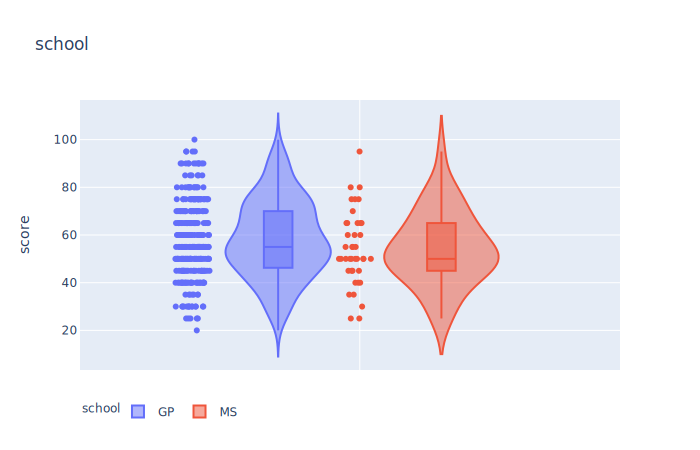

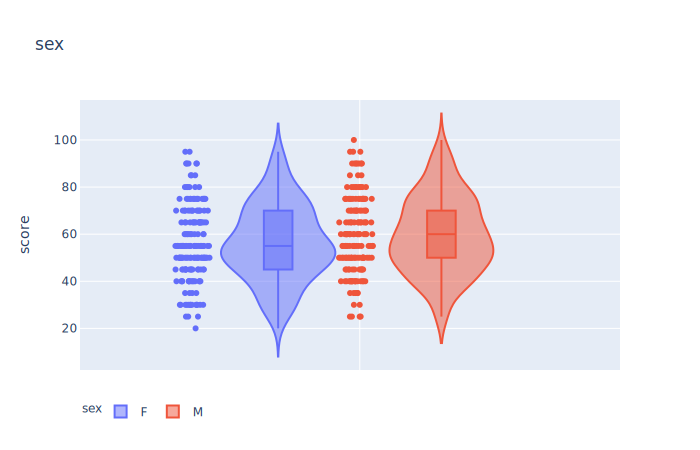

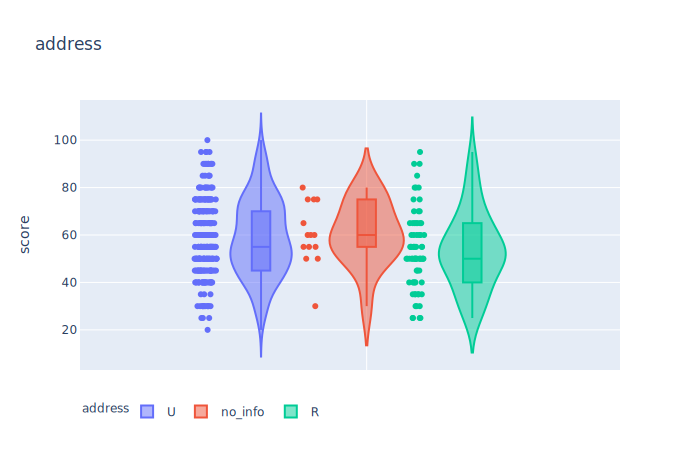

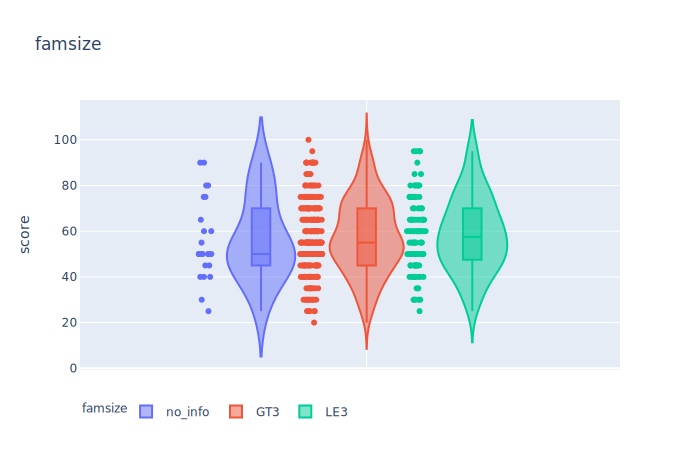

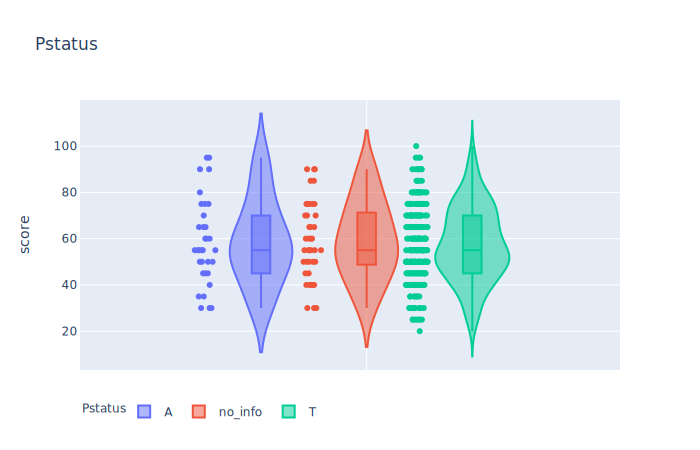

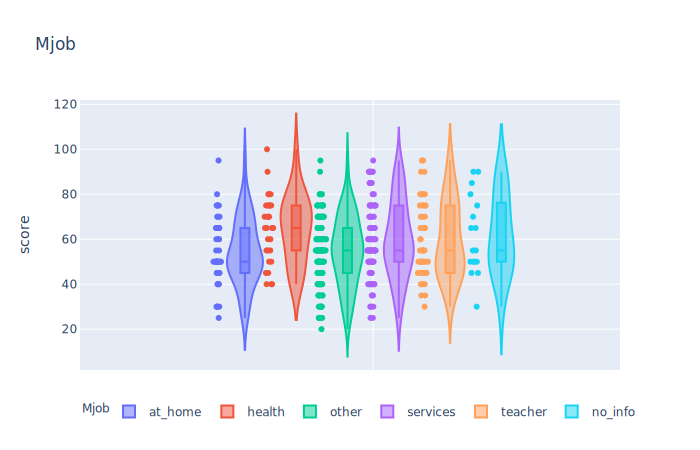

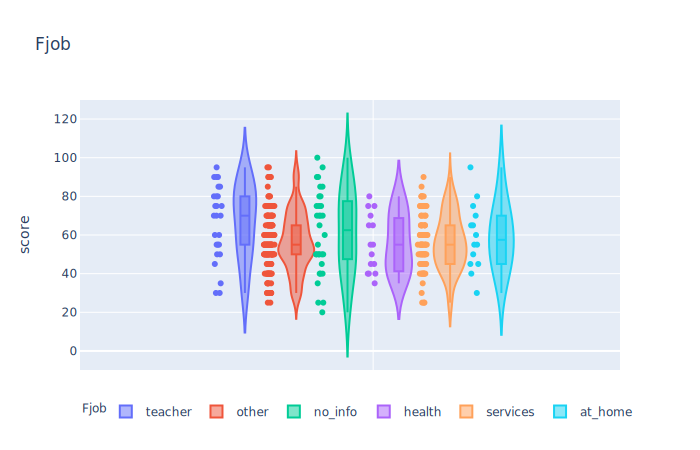

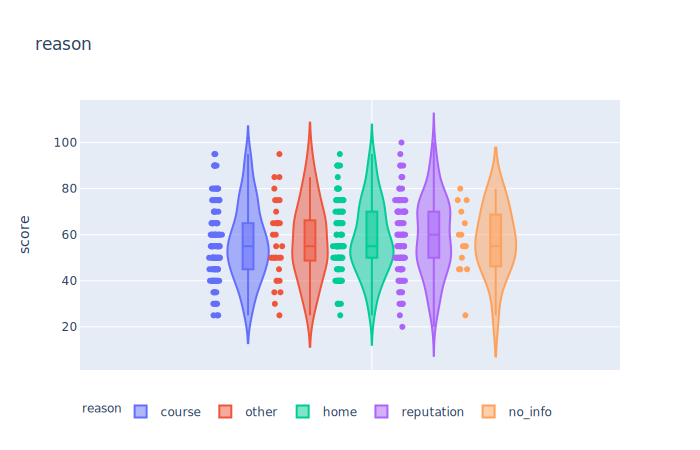

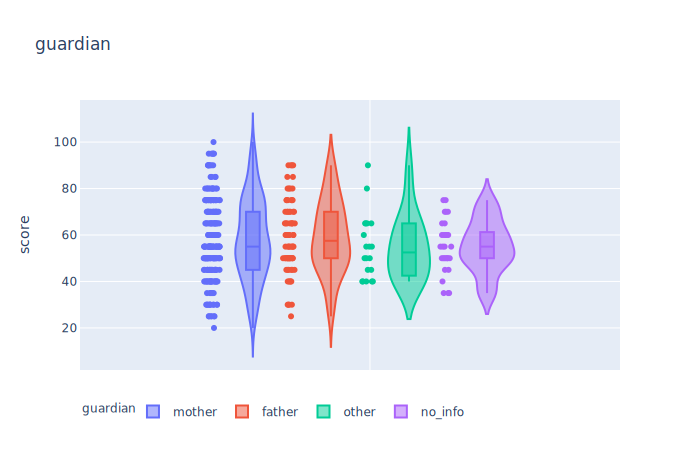

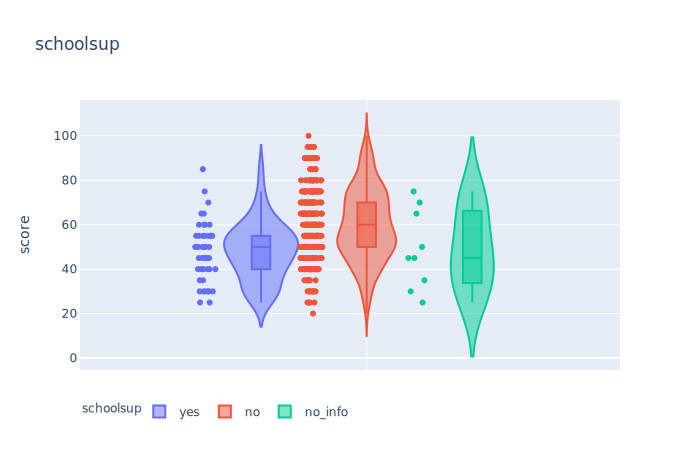

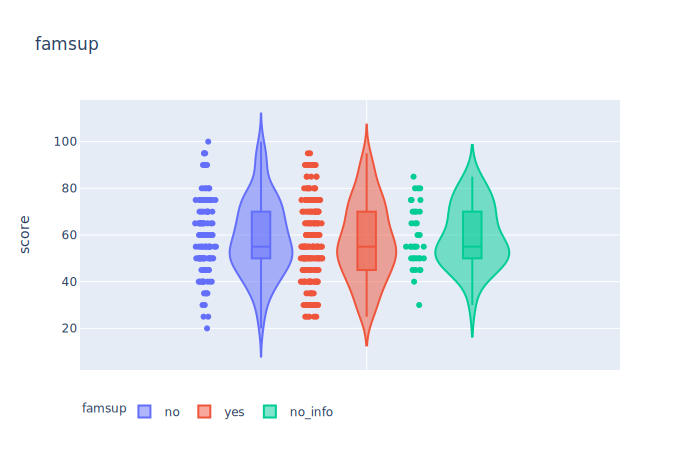

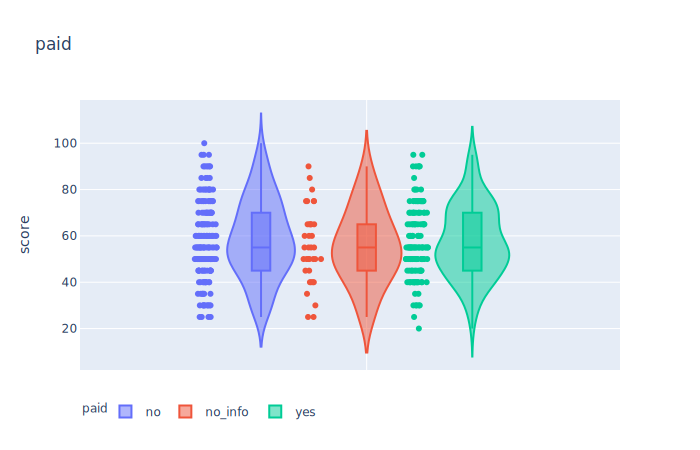

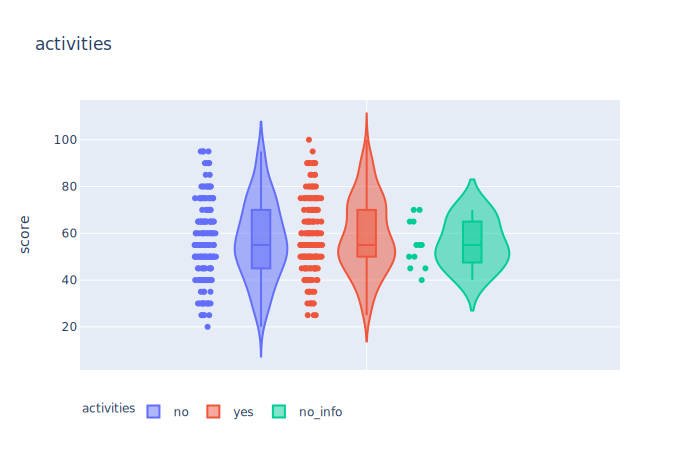

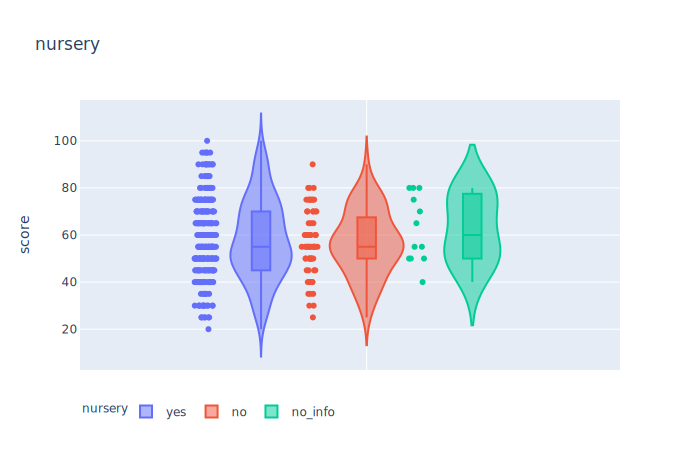

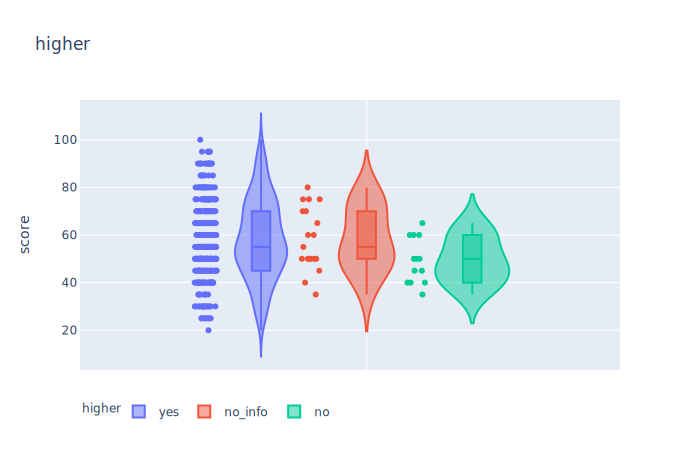

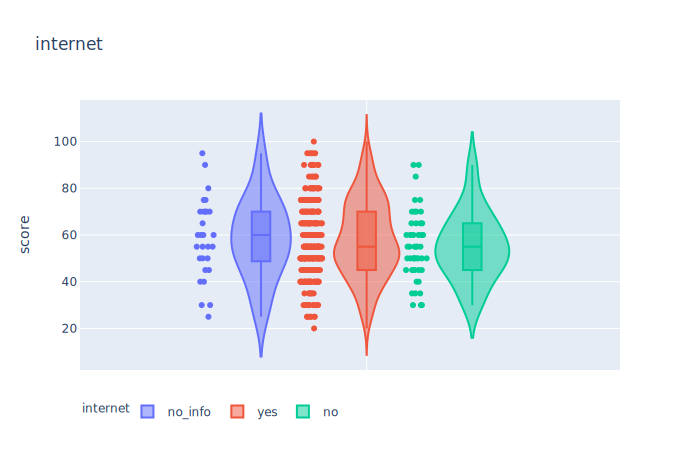

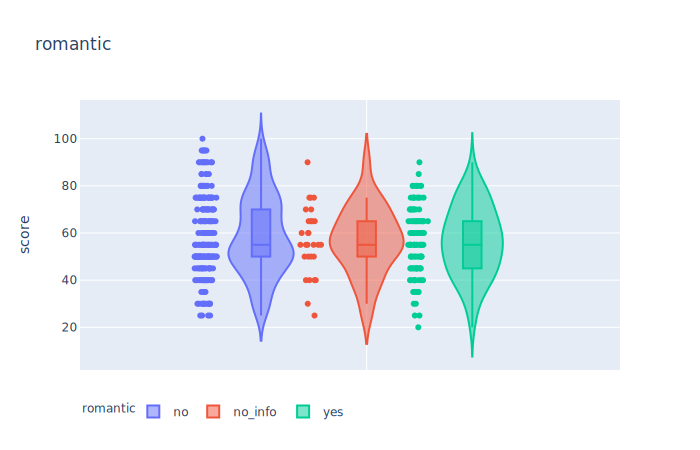

In [21]:
for i in cat_col:
    cat_col_plot(i)

According to the graphs, it seems that not all parameters can affect score. However, graphs are only an auxiliary tool, statistics test can help to recognize the real significance of differences. Let us verify the null hypothesis that the distributions score by various parameters are indistinguishable.

Since we have 2+ different groups, we cannot use the t-test. Also note that the standard deviation of each group are also very different, so we've violated one of our assumpions. However, we are going to use the 1-way ANOVA test anyway just to understand the concepts.

In [22]:
def anova(col):
    lm = ols('score ~ '+col, data=df).fit()
    table = sm.stats.anova_lm(lm)
#     print(col,table['PR(>F)'][0])
    if table['PR(>F)'][0] <= 0.05:
        print('Statistically significant differences found for column', col)

In [23]:
for col in cat_col:
    anova(col)

Statistically significant differences found for column address
Statistically significant differences found for column Mjob
Statistically significant differences found for column Fjob
Statistically significant differences found for column schoolsup


As we can see, 4 parameters has statistically significant differences: address, Mjob, Fjob, schoolsup. We will leave these variables in the dataset for the further construction of the model.

In [24]:
drop = set(cat_col)-set(['address', 'Mjob', 'Fjob', 'schoolsup'])
df.drop(drop, inplace=True, axis=1)

In [25]:
df.head()

,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,studytime_granular,famrel,freetime,goout,health,absences,score
0,18,U,4.0,4.0,at_home,teacher,2.0,2.0,0.0,yes,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,U,1.0,1.0,at_home,other,1.0,2.0,0.0,no,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,U,1.0,1.0,at_home,other,1.0,2.0,3.0,yes,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,U,4.0,2.0,health,no_info,1.0,3.0,0.0,no,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,U,3.0,3.0,other,other,1.0,2.0,0.0,no,-6.0,4.0,3.0,2.0,5.0,4.0,50.0


Look at not object columns

In [26]:
num_col = []
for i in df.columns:
    if df[i].dtype != object:
        num_col.append(i)
num_col

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime_granular',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [27]:
def num_col_analyse(col):
    print(col)
    print('Percentage of missing values: ',
          round((df[col].isna().sum()/len(df))*100))
    print('Count of missing values: ',
          (df[col].isna().sum()))
    fig = px.histogram(df, x=col)
    fig.show()
    print(df[col].describe())

age
Percentage of missing values:  0.0
Count of missing values:  0


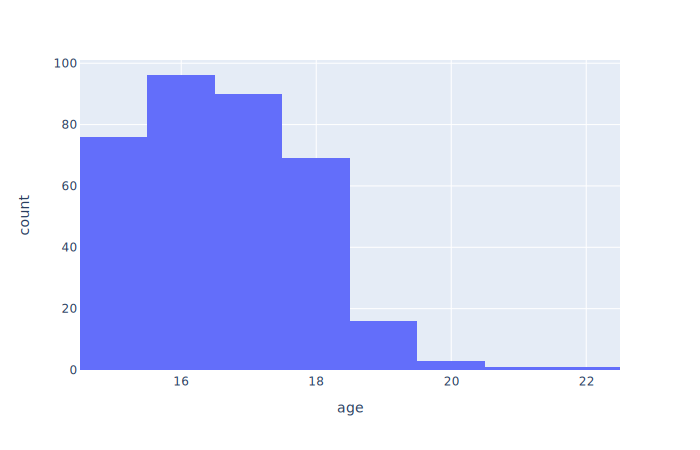

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


In [28]:
num_col_analyse(num_col[0])

In [29]:
df[df.age > 19]

,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,studytime_granular,famrel,freetime,goout,health,absences,score
247,22,U,3.0,1.0,services,services,1.0,1.0,3.0,no,-3.0,5.0,4.0,5.0,1.0,16.0,40.0
306,20,U,3.0,2.0,services,other,1.0,1.0,0.0,no,-3.0,5.0,5.0,3.0,5.0,0.0,90.0
376,20,no_info,4.0,2.0,health,other,2.0,3.0,2.0,no,-9.0,5.0,4.0,3.0,3.0,4.0,75.0
390,20,U,2.0,2.0,services,services,1.0,2.0,2.0,no,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
392,21,R,1.0,1.0,other,other,1.0,1.0,3.0,no_info,-3.0,5.0,5.0,3.0,3.0,3.0,35.0


Basically, the age lies in the range up to 20 years. Delete 2 values greater than 20.

In [30]:
df = df[df.age <= 20]

Medu
Percentage of missing values:  1.0
Count of missing values:  2


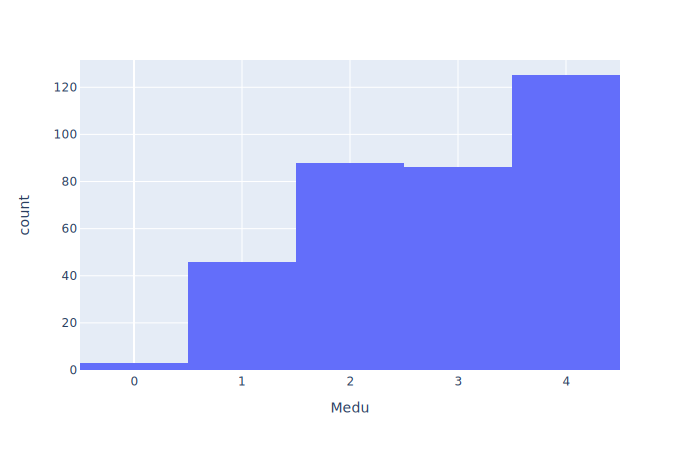

count    348.000000
mean       2.816092
std        1.089946
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


In [31]:
num_col_analyse(num_col[1])

There are only 2 missing values. We will replace them with mode because we have small dataset and rank values.

In [32]:
df['Medu'].fillna(df.Medu.mode()[0], inplace=True)

In [33]:
df['Medu'].isna().sum()

0

Fedu
Percentage of missing values:  6.0
Count of missing values:  21


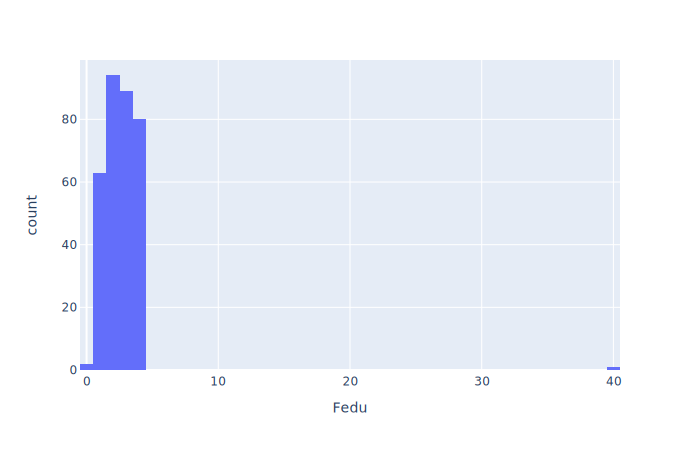

count    329.000000
mean       2.668693
std        2.327518
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


In [34]:
num_col_analyse(num_col[2])

There is one strange value equal 40. It look like mistake because Fedu values equals [0 - 4]. Replace him on 4.
There are 21 missing values. We will replace them with mode because we have small dataset and rank values.


In [35]:
df['Fedu'].replace(40, 4, inplace=True)

In [36]:
df['Fedu'].fillna(df.Fedu.mode()[0], inplace=True)
df['Fedu'].isna().sum()

0

traveltime
Percentage of missing values:  7.0
Count of missing values:  23


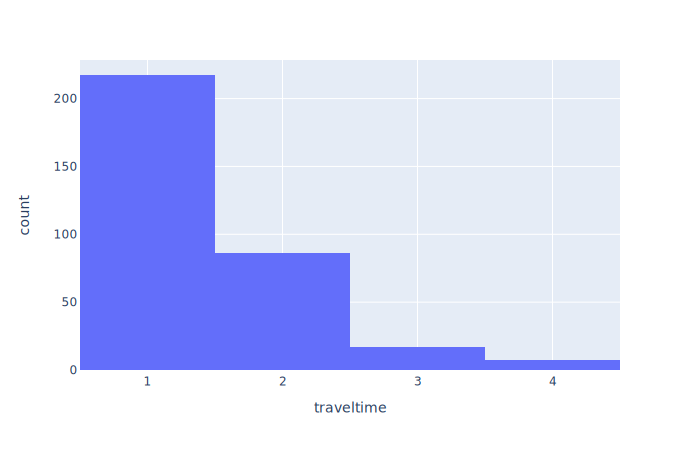

count    327.000000
mean       1.431193
std        0.692204
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


In [37]:
num_col_analyse(num_col[3])

There are 23 missing values. We will replace them with mode because we have small dataset and rank values.

In [38]:
df['traveltime'].fillna(df.traveltime.mode()[0], inplace=True)
df['traveltime'].isna().sum()

0

studytime
Percentage of missing values:  2.0
Count of missing values:  7


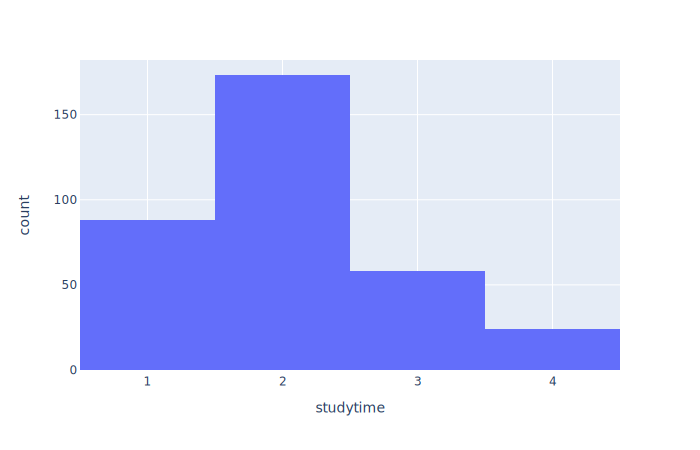

count    343.000000
mean       2.052478
std        0.839548
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


In [39]:
num_col_analyse(num_col[4])

There are 7 missing values. We will replace them with mode because we have small dataset and rank values.

In [40]:
df[df['studytime'].isna()]

,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,studytime_granular,famrel,freetime,goout,health,absences,score
17,16,U,3.0,3.0,other,no_info,3.0,NaN,0.0,yes,NaN,5.0,3.0,2.0,4.0,4.0,50.0
91,15,U,4.0,3.0,services,other,1.0,NaN,NaN,no,NaN,4.0,5.0,5.0,1.0,4.0,90.0
112,16,U,2.0,2.0,at_home,other,1.0,NaN,1.0,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,16,R,4.0,4.0,teacher,teacher,1.0,NaN,0.0,no,NaN,3.0,5.0,5.0,4.0,NaN,90.0
227,17,U,2.0,3.0,services,services,1.0,NaN,0.0,no,NaN,5.0,3.0,3.0,3.0,NaN,60.0
266,17,U,3.0,1.0,services,no_info,1.0,NaN,0.0,no,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,19,U,1.0,1.0,at_home,health,1.0,NaN,2.0,no,NaN,4.0,NaN,2.0,3.0,14.0,65.0


In [41]:
df['studytime'].fillna(df.studytime.mode()[0], inplace=True)
df['studytime'].isna().sum()

0

failures
Percentage of missing values:  6.0
Count of missing values:  20


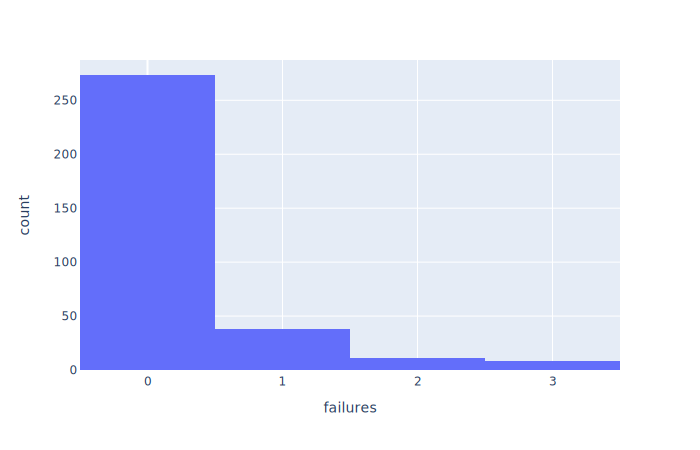

count    330.000000
mean       0.254545
std        0.634897
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


In [42]:
num_col_analyse(num_col[5])

There are 20 missing values. We will replace them with mode because we have small dataset and rank values.

In [43]:
df['failures'].fillna(df.failures.mode()[0], inplace=True)
df['failures'].isna().sum()

0

studytime_granular
Percentage of missing values:  2.0
Count of missing values:  7


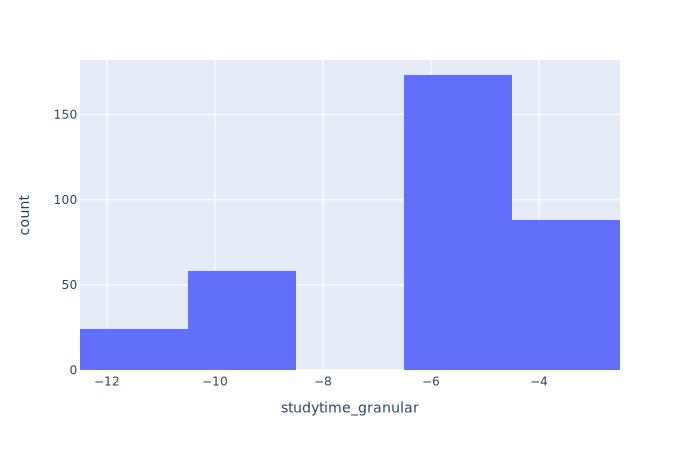

count    343.000000
mean      -6.157434
std        2.518643
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64


In [44]:
num_col_analyse(num_col[6])

Column without description. Look like modifying column 'studytime'. Let's look at correlation matrix.

In [45]:
df[['studytime', 'studytime_granular', 'score']].corr()

,studytime,studytime_granular,score
studytime,1.000000,-1.000000,0.131803
studytime_granular,-1.000000,1.000000,-0.134241
score,0.131803,-0.134241,1.000000


Since the studytime and 'studytime, granular' variables are completely correlated, one variable can be excluded. Let it be the 'studytime, granular' variable.

In [46]:
df.drop(['studytime_granular'], axis=1, inplace=True)

famrel
Percentage of missing values:  7.0
Count of missing values:  24


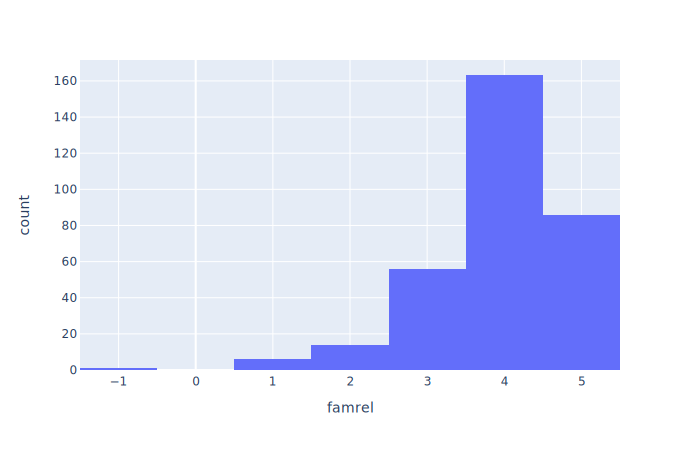

count    326.000000
mean       3.935583
std        0.920948
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


In [47]:
num_col_analyse(num_col[7])

There is one strange value equal -1. It look like mistake because famrel values equals [1 - 5]. Replace him on 1. There are 24 missing values. We will replace them with mode because we have small dataset and rank values.

In [48]:
df['famrel'].replace(-1, 1, inplace=True)

In [49]:
df['famrel'].fillna(df.famrel.mode()[0], inplace=True)
df['famrel'].isna().sum()

0

freetime
Percentage of missing values:  2.0
Count of missing values:  8


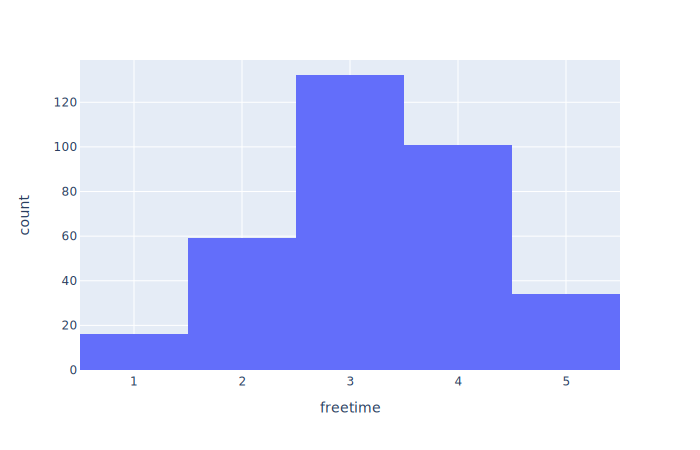

count    342.000000
mean       3.228070
std        1.001773
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


In [50]:
num_col_analyse(num_col[8])

There are 8 missing values. We will replace them with mode because we have small dataset and rank values.

In [51]:
df['freetime'].fillna(df.freetime.mode()[0], inplace=True)
df['freetime'].isna().sum()

0

goout
Percentage of missing values:  2.0
Count of missing values:  6


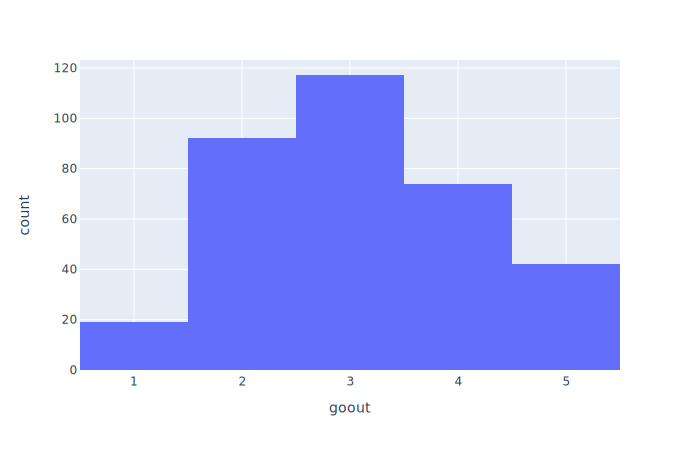

count    344.000000
mean       3.081395
std        1.090271
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


In [52]:
num_col_analyse(num_col[9])

There are 6 missing values. We will replace them with mode because we have small dataset and rank values.

In [53]:
df['goout'].fillna(df.goout.mode()[0], inplace=True)
df['goout'].isna().sum()

0

health
Percentage of missing values:  4.0
Count of missing values:  13


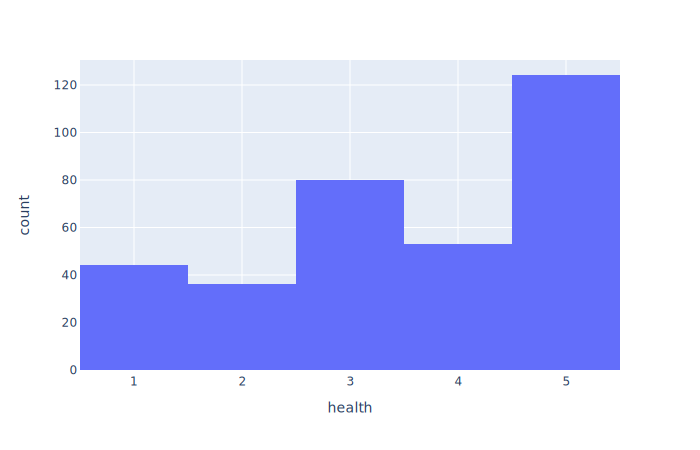

count    337.000000
mean       3.525223
std        1.410036
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


In [54]:
num_col_analyse(num_col[10])

There are 13 missing values. We will replace them with mode because we have small dataset and rank values.

In [55]:
df['health'].fillna(df.health.mode()[0], inplace=True)
df['health'].isna().sum()

0

absences
Percentage of missing values:  3.0
Count of missing values:  10


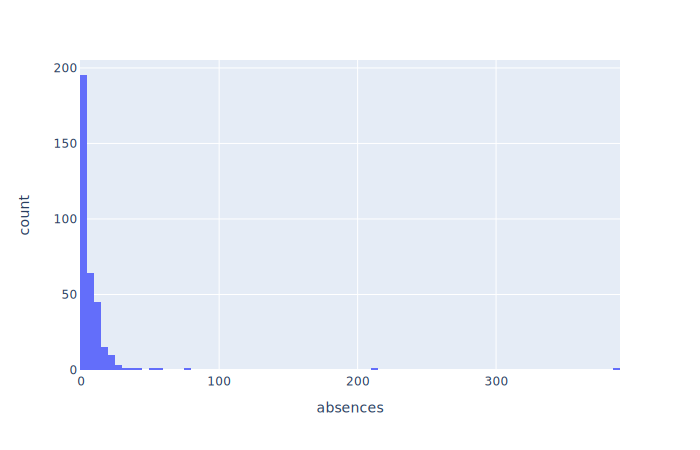

count    340.000000
mean       8.082353
std       24.772100
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


In [56]:
num_col_analyse(num_col[11])

There are outliers. Drop values more then 23.
There are 11 missing values. We will replace them with mode because we have small dataset.

In [57]:
df['absences'].fillna(df.absences.mode()[0], inplace=True)
df['absences'].isna().sum()

0

In [58]:
df = df[df['absences'] < 24]

absences
Percentage of missing values:  0.0
Count of missing values:  0


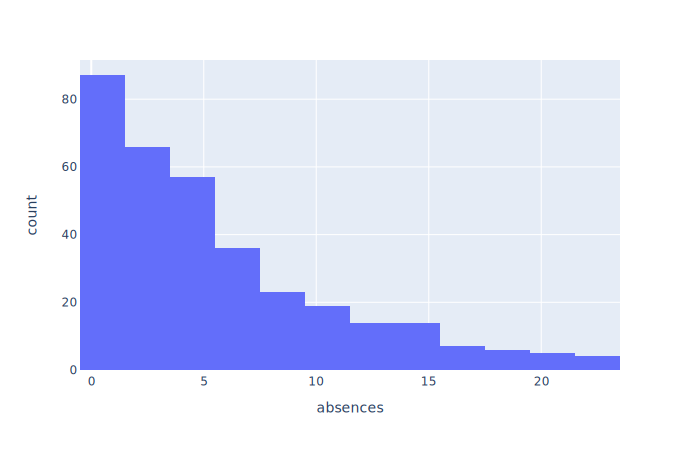

count    338.000000
mean       5.192308
std        5.358512
min        0.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       23.000000
Name: absences, dtype: float64


In [59]:
num_col_analyse(num_col[11])

score
Percentage of missing values:  0.0
Count of missing values:  0


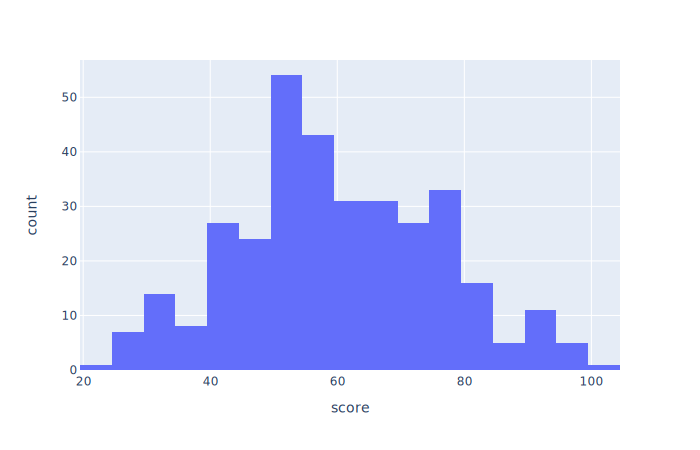

count    338.000000
mean      58.076923
std       16.090434
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


In [60]:
num_col_analyse(num_col[12])

So, we have ordinal data: Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health.

And numerical data: age, absences, score.

Find out which columns correlate with the score. This will help to understand which parameters should be left for the model and which ones should be excluded.

As the data have non-normal distribution and ordinal data, we will use Spearman correlation

In [61]:
num_col = []
for i in df.columns:
    if df[i].dtype != object:
        num_col.append(i)
num_col

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [62]:
df[num_col].corr('spearman')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.121318,-0.095904,0.152182,0.041821,0.153722,0.007596,-0.030473,0.139744,-0.062431,0.191258,-0.119352
Medu,-0.121318,1.000000,0.578275,-0.152197,0.079369,-0.197743,0.012446,0.035539,0.067531,-0.060260,0.060068,0.187335
Fedu,-0.095904,0.578275,1.000000,-0.112414,0.003995,-0.244521,0.018649,-0.024258,0.056199,-0.031827,-0.044028,0.125548
traveltime,0.152182,-0.152197,-0.112414,1.000000,-0.095279,0.078667,-0.031671,-0.009951,0.000742,-0.058528,-0.018665,-0.073716
studytime,0.041821,0.079369,0.003995,-0.095279,1.000000,-0.124670,0.085995,-0.110729,-0.015364,-0.103612,-0.060449,0.118528
failures,0.153722,-0.197743,-0.244521,0.078667,-0.124670,1.000000,-0.035633,0.122028,0.125220,0.110449,0.198509,-0.288311
famrel,0.007596,0.012446,0.018649,-0.031671,0.085995,-0.035633,1.000000,0.136321,0.020953,0.105170,-0.098934,0.088710
freetime,-0.030473,0.035539,-0.024258,-0.009951,-0.110729,0.122028,0.136321,1.000000,0.281876,0.088260,0.018714,-0.005382
goout,0.139744,0.067531,0.056199,0.000742,-0.015364,0.125220,0.020953,0.281876,1.000000,0.002879,0.129992,-0.174000
health,-0.062431,-0.060260,-0.031827,-0.058528,-0.103612,0.110449,0.105170,0.088260,0.002879,1.000000,-0.042904,-0.065358


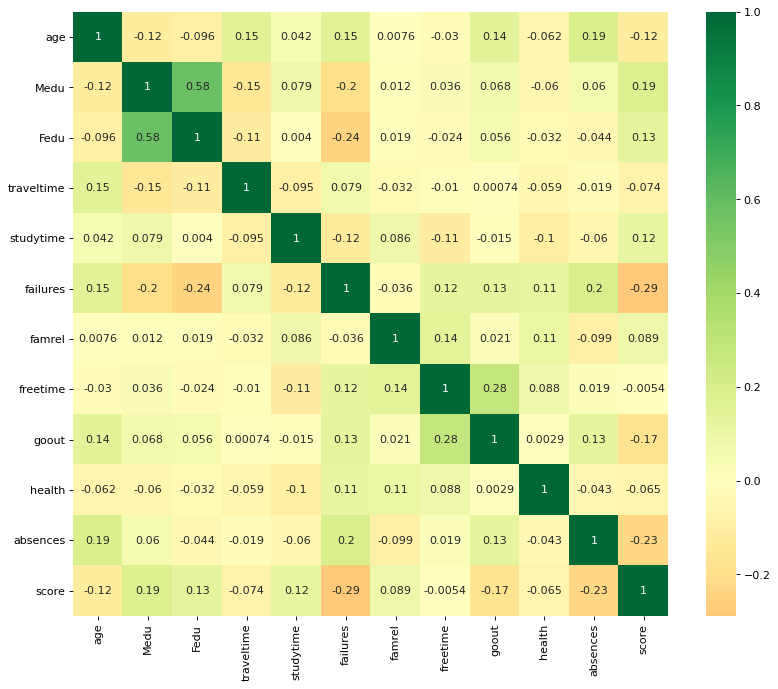

In [63]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df[num_col].corr('spearman'), cmap='RdYlGn', center=0, annot=True)
plt.show()

We can see that these columns are weakly correlated.

In [64]:
df.shape

(338, 16)

In [65]:
df.head()

,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famrel,freetime,goout,health,absences,score
0,18,U,4.0,4.0,at_home,teacher,2.0,2.0,0.0,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,17,U,1.0,1.0,at_home,other,1.0,2.0,0.0,no,5.0,3.0,3.0,3.0,4.0,30.0
2,15,U,1.0,1.0,at_home,other,1.0,2.0,3.0,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,15,U,4.0,2.0,health,no_info,1.0,3.0,0.0,no,3.0,2.0,2.0,5.0,2.0,75.0
4,16,U,3.0,3.0,other,other,1.0,2.0,0.0,no,4.0,3.0,2.0,5.0,4.0,50.0


So, in our case, important variables that may have an effect on the score are: age, addres, Medu, Fedu, Mjob, Fjob, traveltime, studytime, failures, schoolsup, famrel, goout, health, absences.

## Сonclusion

So, as a result of EDA for the analysis of the influence of student's living conditions on math scores, the following conclusions were obtained:

There are not many missing values in the data.

Outliers were found only in the columns with score, age and absences, which allows us to conclude that the data is quite clean.

In the columns of famrel, Fedu had values with errors.

The studytime_granular column is probably a modification of the studytime column. studytime_granular has been deleted.

Data is not highly correlated.

The most important parameters that are proposed to be used later to build the model are age, addres, Medu, Fedu, Mjob, Fjob, traveltime, studytime, failures, schoolsup, famrel, goout, health, absences.